In [1]:
import pandas as pd
crash_data = pd.read_csv('/home/nizam/Desktop/Sem3/project/Crashes_Last_Five_Years.csv')

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
filtered_data = crash_data[crash_data['ALCOHOL_RELATED']=='Yes']
group_by_regions = filtered_data.groupby(by=['DEG_URBAN_ALL','LGA_NAME'])
for i in group_by_regions:
    print(len(i[1]))

49
32
59
8
3
20
24
43
67
8
90
83
24
60
31
26
39
43
47
16
30
38
43
14
48
26
43
48
9
38
39
34
50
40
26
49
1
7
4
12
11
18
4
24
7
21
25
4
8
21
17
29
8
35
12
26
16
5
6
10
3
4
35
5
17
12
18
25
19
12
24
17
7
16
18
20
5
10
19
21
8
9
21
14
2
13
4
34
1
16
2
12
32
1
2
3
2
2
1
2
3
1
3
3
4
5
2
2
6
8
4
6
18
13
15
3
22
2
4
12
5
2
1
1
1
1
1
1
2
3
1
4
2
3
1
2
2
1
3
1
1
1
2
1
1
2
1
1
1
1
1
2
2
6
7
3
1
2
2
1
1
4
4
2
3
7
3
2
3
8
1
2
7
8
4
4
3
1
3
1
3
6
1
6
6
1
1
1
2
2


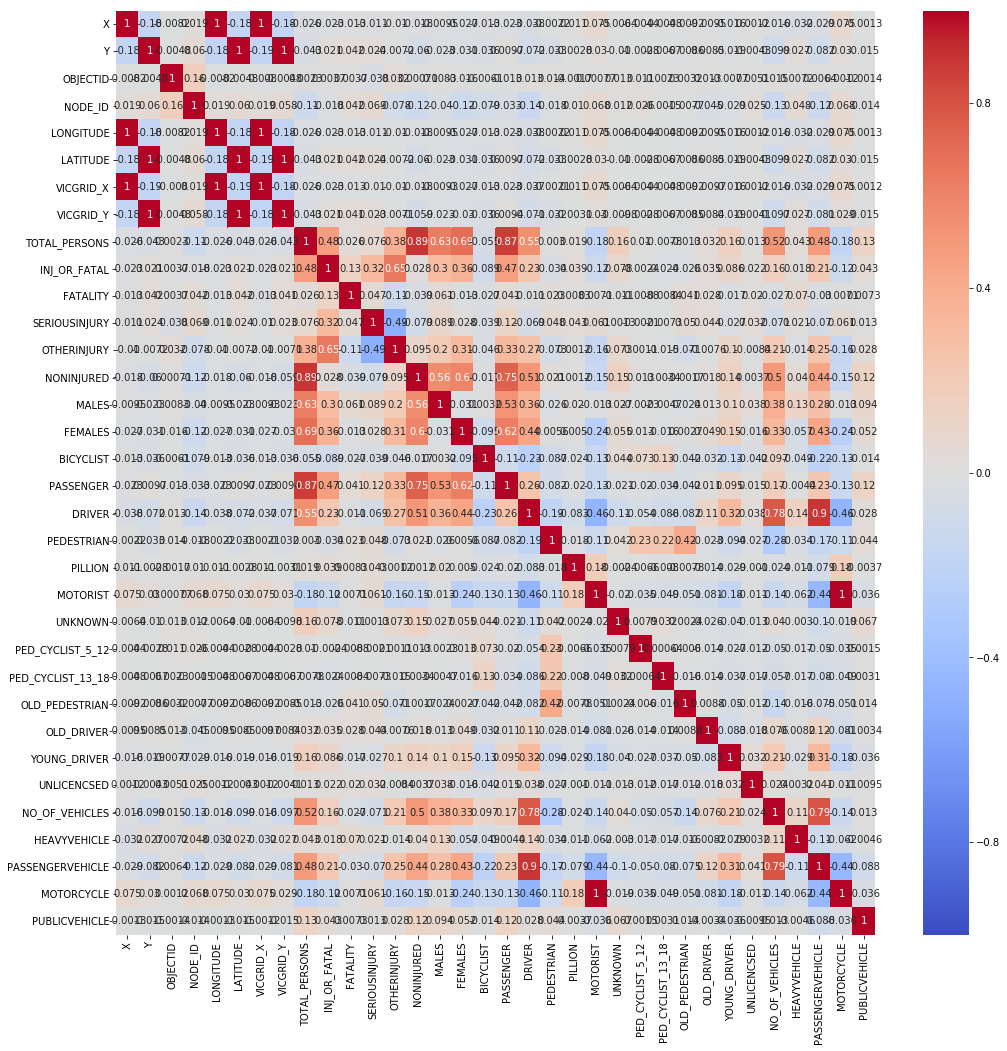

In [4]:
plt.figure(figsize=(17,17))
sns.heatmap(crash_data.corr(),vmin=-1,cmap='coolwarm',annot=True)

### Fetching the indices of those records where alcohol related accidents are between 2015 and 2017

In [5]:
dates = list(filtered_data['ACCIDENT_DATE'])
dates_2015_t0_2017 = list(filter(lambda date:date.endswith('2015') or date.endswith('2016') or date.endswith('2017'),dates))

dates = pd.DataFrame(filtered_data['ACCIDENT_DATE'])
indices = dates.index[dates['ACCIDENT_DATE'].isin(dates_2015_t0_2017)].tolist()

len(dates_2015_t0_2017)==len(indices)

True

In [6]:
temp = []
for i in dates.iterrows():
    temp.append((i[0]))

In [7]:
temp2 = []
for i in indices:
    temp2.append((filtered_data.iloc[temp.index(i)]))
alcohol_2015_to_2017_data = pd.DataFrame(temp2)


In [8]:
alcohol_2015_to_2017_data.columns=['X', 'Y', 'OBJECTID', 'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME', 'ACCIDENT_TYPE',
       'DAY_OF_WEEK', 'DCA_CODE', 'HIT_RUN_FLAG', 'LIGHT_CONDITION',
       'POLICE_ATTEND', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'NODE_ID', 'LONGITUDE', 'LATITUDE', 'NODE_TYPE',
       'LGA_NAME', 'REGION_NAME', 'VICGRID_X', 'VICGRID_Y', 'TOTAL_PERSONS',
       'INJ_OR_FATAL', 'FATALITY', 'SERIOUSINJURY', 'OTHERINJURY',
       'NONINJURED', 'MALES', 'FEMALES', 'BICYCLIST', 'PASSENGER', 'DRIVER',
       'PEDESTRIAN', 'PILLION', 'MOTORIST', 'UNKNOWN', 'PED_CYCLIST_5_12',
       'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER', 'YOUNG_DRIVER',
       'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES', 'HEAVYVEHICLE',
       'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE', 'DEG_URBAN_NAME',
       'DEG_URBAN_ALL', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 'SRNS', 'SRNS_ALL',
       'RMA', 'RMA_ALL', 'DIVIDED', 'DIVIDED_ALL', 'STAT_DIV_NAME']

In [27]:
group_by_LGA_2015_to_2017 = alcohol_2015_to_2017_data.groupby(by=['LGA_NAME'])
no_alcohol_crashes_by_LGA_2015_to_2017 =  group_by_LGA_2015_to_2017.size().sort_values(ascending=False)#77

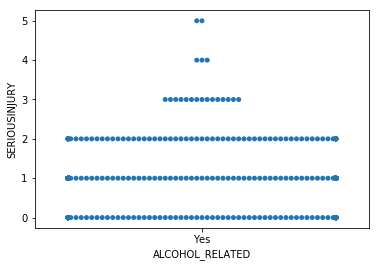

In [10]:
swarm = sns.swarmplot(x="ALCOHOL_RELATED", y="SERIOUSINJURY", data=filtered_data[:1000])


AttributeError: Unknown property kind

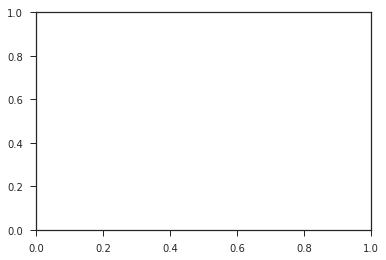

In [11]:
sns.set(style="ticks", color_codes=True)
sns.stripplot(x="ALCOHOL_RELATED", y="SERIOUSINJURY", kind="box", data=crash_data)


In [ ]:
sns.countplot(y="ALCOHOL_RELATED", data=crash_data)

In [ ]:
plt.scatter(x="ALCOHOL_RELATED", y="SERIOUSINJURY", data=crash_data)


In [ ]:
sum(crash_data['ALCOHOL_RELATED']=='Yes')

# Contingency table considering SEVERITY and ALCOHOL_RELATED factors

In [ ]:
alcohol_impact = pd.crosstab(index=crash_data['ALCOHOL_RELATED'], columns=crash_data['SEVERITY'])
alcohol_impact

# Accidents due to alcohol consumption, grouped by the day of week

In [ ]:
group_by_week = filtered_data.groupby(by=['DAY_OF_WEEK'])
group_by_week.size()

# Accidents due to alcohol consumption, grouped by the regions

In [ ]:
group_by_regions = filtered_data.groupby(by=['REGION_NAME_ALL','LGA_NAME'])

In [ ]:
import numpy as np
import pandas as pd


def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.metrics import roc_curve, auc


def _display_plot():
    plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


def binary_roc_graph(y_true, y_pred, **kwargs):
    """
    This function plots a ROC graph of a binary-class predictor. AUC calculation are presented as-well.
    Data can be either: (1) one dimensional, where the values of y_true represent the true class and y_pred the
    predicted probability of that class, or (2) two-dimensional, where each line in y_true is a one-hot-encoding
    of the true class and y_pred holds the predicted probabilities of each class.
    For example, consider a data-set of two data-points where the true class of the first line is class 0, which
    was predicted with a probability of 0.6, and the second line's true class is 1, with predicted probability of
    0.8. In the first configuration, the input will be: y_true = [0,1], y_pred = [0.6,0.8]. In the second
    configuration, the input will be: y_true = [[1,0],[0,1]], y_pred = [[0.6,0.4],[0.2,0.8]].
    Based on sklearn examples (as was seen on April 2018):
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    :param y_true: list / NumPy ndarray
                   The true classes of the predicted data
    :param y_pred: list / NumPy ndarray
                   The predicted classes
    :param kwargs: Different options and configurations
    :return: None
    """
    y_true = convert(y_true, 'array')
    y_pred = convert(y_pred, 'array')
    if y_pred.shape != y_true.shape:
        raise ValueError('y_true and y_pred must have the same shape')
    elif len(y_pred.shape) == 1:
        y_t = y_true
        y_p = y_pred
    else:
        y_t = [np.argmax(x) for x in y_true]
        y_p = [x[1] for x in y_pred]
    fpr, tpr, _ = roc_curve(y_t, y_p)
    auc_score = auc(fpr,tpr)
    color = kwargs.get('color','darkorange')
    lw = kwargs.get('lw', 2)
    ls = kwargs.get('ls','-')
    ms = kwargs.get('ms', 10)
    fmt = kwargs.get('fmt','.2f')
    if 'class_label' in kwargs:
        class_label = ': {}'.format(kwargs['class_label'])
    else:
        class_label = ''
    if kwargs.get('new_figure',True):
        plt.figure()
    plt.plot(fpr, tpr, color=color, lw=lw, ls=ls, label='ROC curve{class_label} (AUC = {auc:{fmt}})'
             .format(class_label=class_label,auc=auc_score,fmt=fmt))
    if kwargs.get('show_graphs',True):
        _display_plot()
    if kwargs.get('return_pr',False):
        return {'fpr': fpr, 'tpr': tpr}


def _plot_macro_roc(fpr, tpr, n, **kwargs):
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n
    fpr_macro = all_fpr
    tpr_macro = mean_tpr
    auc_macro = auc(fpr_macro, tpr_macro)
    fmt = kwargs.get('fmt', '.2f')
    lw = kwargs.get('lw', 2)
    plt.plot(fpr_macro, tpr_macro, label='ROC curve: macro (AUC = {auc:{fmt}})'.format(auc=auc_macro,fmt=fmt),
             color='navy', ls=':', lw=lw)


def roc_graph(y_true, y_pred, micro=True, macro=True, **kwargs):
    """
    Plot a ROC graph of predictor's results (inclusding AUC scores), where each row of y_true and y_pred
    represent a single example.
    If there are 1 or two columns only, the data is treated as a binary classification, in which
    the result is similar to the `binary_roc_graph` method, see its documentation for more information.
    If there are more then 2 columns, each column is considered a unique class, and a ROC graph and AUC
    score will be computed for each. A Macro-ROC and Micro-ROC are computed and plotted too by default.
    Based on sklearn examples (as was seen on April 2018):
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    :param y_true: list / NumPy ndarray
                   The true classes of the predicted data
    :param y_pred: list / NumPy ndarray
                   The predicted classes
    :param micro: boolean
                  Whether to calculate a Micro ROC graph (not applicable for binary cases)
    :param macro: boolean
                  Whether to calculate a Macro ROC graph (not applicable for binary cases)
    :param kwargs: Different options and configurations
    :return: None
    """
    all_fpr = list()
    all_tpr = list()
    y_true = convert(y_true, 'array')
    y_pred = convert(y_pred, 'array')
    if y_pred.shape != y_true.shape:
        raise ValueError('y_true and y_pred must have the same shape')
    elif len(y_pred.shape) == 1 or y_pred.shape[1] <= 2:
        return binary_roc_graph(y_true, y_pred, **kwargs)
    else:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        n = y_pred.shape[1]
        plt.figure()
        kwargs['new_figure'] = False
        kwargs['show_graphs'] = False
        kwargs['return_pr'] = True
        for i in range(0,n):
            pr = binary_roc_graph(y_true[:,i], y_pred[:,i],
                                   color=colors[i % len(colors)],class_label=i, **kwargs)
            all_fpr.append(pr['fpr'])
            all_tpr.append(pr['tpr'])
        if micro:
            binary_roc_graph(y_true.ravel(), y_pred.ravel(), ls=':',
                              color='deeppink', class_label='micro', **kwargs)
        if macro:
            _plot_macro_roc(all_fpr,all_tpr,n)
        _display_plot()


def random_forest_feature_importance(forest, features, **kwargs):
    """
    Given a trained `sklearn.ensemble.RandomForestClassifier`, plot the different features based on their
    importance according to the classifier, from the most important to the least.
    :param forest: sklearn.ensemble.RandomForestClassifier
                   A trained `RandomForestClassifier`
    :param features: list
                     A list of the names of the features the classifier was trained on, ordered by the same
                     order the appeared in the training data
    :param kwargs: Different options and configurations
    :return: None
    """
    return sorted(zip(map(lambda x: round(x, kwargs.get('precision',4)), forest.feature_importances_), features),
                  reverse=True)


def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True, return_results=False, **kwargs):
    """
    See 'associations' in the 'nominal' module.
    """
    return nominal.associations(dataset,nominal_columns,mark_columns,theil_u,plot,return_results,**kwargs)


In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from collections import Counter


def conditional_entropy(x, y):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    :param x: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :param y: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :return: float
    """
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy


def cramers_v(x, y):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    Uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328.
    This is a symmetric coefficient: V(x,y) = V(y,x)
    Original function taken from: https://stackoverflow.com/a/46498792/5863503
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    :param x: list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    :param y: list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    :return: float
        in the range of [0,1]
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def theils_u(x, y):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-categorical association.
    This is the uncertainty of x given y: value is on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    :param x: list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    :param y: list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    :return: float
        in the range of [0,1]
    """
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


def correlation_ratio(categories, measurements):
    """
    Calculates the Correlation Ratio (sometimes marked by the greek letter Eta) for categorical-continuous association.
    Answers the question - given a continuous value of a measurement, is it possible to know which category is it
    associated with?
    Value is in the range [0,1], where 0 means a category cannot be determined by a continuous measurement, and 1 means
    a category can be determined with absolute certainty.
    Wikipedia: https://en.wikipedia.org/wiki/Correlation_ratio
    :param categories: list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    :param measurements: list / NumPy ndarray / Pandas Series
        A sequence of continuous measurements
    :return: float
        in the range of [0,1]
    """
    categories = convert(categories, 'array')
    measurements = convert(measurements, 'array')
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta


def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True,
                          return_results = False, **kwargs):
    """
    Calculate the correlation/strength-of-association of features in data-set with both categorical (eda_tools) and
    continuous features using:
     - Pearson's R for continuous-continuous cases
     - Correlation Ratio for categorical-continuous cases
     - Cramer's V or Theil's U for categorical-categorical cases
    :param dataset: NumPy ndarray / Pandas DataFrame
        The data-set for which the features' correlation is computed
    :param nominal_columns: string / list / NumPy ndarray
        Names of columns of the data-set which hold categorical values. Can also be the string 'all' to state that all
        columns are categorical, or None (default) to state none are categorical
    :param mark_columns: Boolean (default: False)
        if True, output's columns' names will have a suffix of '(nom)' or '(con)' based on there type (eda_tools or
        continuous), as provided by nominal_columns
    :param theil_u: Boolean (default: False)
        In the case of categorical-categorical feaures, use Theil's U instead of Cramer's V
    :param plot: Boolean (default: True)
        If True, plot a heat-map of the correlation matrix
    :param return_results: Boolean (default: False)
        If True, the function will return a Pandas DataFrame of the computed associations
    :param kwargs:
        Arguments to be passed to used function and methods
    :return: Pandas DataFrame
        A DataFrame of the correlation/strength-of-association between all features
    """

    dataset = convert(dataset, 'dataframe')
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',True), fmt=kwargs.get('fmt','.2f'))
        plt.show()
    if return_results:
        return corr


def numerical_encoding(dataset, nominal_columns='all', drop_single_label=False, drop_fact_dict=True):
    """
    Encoding a data-set with mixed data (numerical and categorical) to a numerical-only data-set,
    using the following logic:
    - categorical with only a single value will be marked as zero (or dropped, if requested)
    - categorical with two values will be replaced with the result of Pandas `factorize`
    - categorical with more than two values will be replaced with the result of Pandas `get_dummies`
    - numerical columns will not be modified
    :param dataset: NumPy ndarray / Pandas DataFrame
        The data-set to encode
    :param nominal_columns: sequence / string
        A sequence of the nominal (categorical) columns in the dataset. If string, must be 'all' to state that
        all columns are nominal. If None, nothing happens. Default: 'all'
    :param drop_single_label: Boolean (default: False)
        If True, nominal columns with a only a single value will be dropped.
    :param drop_fact_dict: Boolean (default: True)
        If True, the return value will be the encoded DataFrame alone. If False, it will be a tuple of
        the DataFrame and the dictionary of the binary factorization (originating from pd.factorize)
    :return: DataFrame or (DataFrame, dict)
        If drop_fact_dict is True, returns the encoded DataFrame. else, returns a tuple of the encoded DataFrame and
        dictionary, where each key is a two-value column, and the value is the original labels, as supplied by
        Pandas `factorize`. Will be empty if no two-value columns are present in the data-set
    """
    dataset = convert(dataset, 'dataframe')
    if nominal_columns is None:
        return dataset
    elif nominal_columns == 'all':
        nominal_columns = dataset.columns
    converted_dataset = pd.DataFrame()
    binary_columns_dict = dict()
    for col in dataset.columns:
        if col not in nominal_columns:
            converted_dataset.loc[:,col] = dataset[col]
        else:
            unique_values = pd.unique(dataset[col])
            if len(unique_values) == 1 and not drop_single_label:
                converted_dataset.loc[:,col] = 0
            elif len(unique_values) == 2:
                converted_dataset.loc[:,col], binary_columns_dict[col] = pd.factorize(dataset[col])
            else:
                dummies = pd.get_dummies(dataset[col],prefix=col)
                converted_dataset = pd.concat([converted_dataset,dummies],axis=1)
    if drop_fact_dict:
        return converted_dataset
    else:
        return converted_dataset, binary_columns_dict


In [ ]:
numerical_encoding(alcohol_2015_to_2017_data,drop_fact_dict=False)

In [ ]:
filtered_data = crash_data[crash_data['ALCOHOL_RELATED']=='Yes']
theils_u(filtered_data['ALCOHOLTIME'],filtered_data['FATALITY'])

In [ ]:
plt.figure(figsize=(7,7))
sns.stripplot( x="FATALITY",y="DAY_OF_WEEK", data=filtered_data,size=10)#ideal for categorical values

## PTV-API work in progress..

In [ ]:
DEVELOPER_ID = 3001162
API_KEY = '072ff25f-1775-42c6-a631-96047dddec7b'

In [ ]:
from pyptv import PTVClient
client = PTVClient(developer_id=DEVELOPER_ID, api_key=API_KEY)
client.healthcheck()

In [ ]:
client.stops_nearby((-37.771141, 144.961599), mode="tram")

In [ ]:
from pyptv.location import parse_location

base_path = "/v2/nearme/latitude/{lat}/longitude/{lon}"

lat, lon = parse_location((-37.771141, 144.961599))

path = base_path.format(lat=lat, lon=lon)

stops = client._api_request(path)


def _api_request(self, api_path, timed=True):
        """Call some api end point and return the raw response.
        API request will have proper signing key appended.
        """

        parsed = urlparse.urlparse(api_path)

        # parse out current query
        query = urlparse.parse_qsl(parsed.query)

        # add timestamp
        if timed:
            now = datetime.utcnow().replace(microsecond=0).isoformat() + 'Z'
            query.append(('timestamp', now))

        # add developer id
        query.append(('devid', self.developer_id))

        unsigned_query = urllib.urlencode(query)
        unsigned_parsed = parsed._replace(query=unsigned_query)

        unsigned_path = unsigned_parsed.geturl()

        digest = hmac.new(self.api_key, unsigned_path, sha1)

        signature = digest.hexdigest()

        query.append(('signature', signature))
        signed_query = urllib.urlencode(query)
        signed_parsed = unsigned_parsed._replace(query=signed_query)

        signed_path = signed_parsed.geturl()

        signed_url = urlparse.urljoin(API_BASE_URL, signed_path)

        req = requests.get(signed_url)

        data = json.loads(req.content)

        return data


In [ ]:
stops

In [ ]:
from hashlib import sha1
import hmac
import binascii
def getUrl(request):
    devId = DEVELOPER_ID
    key = API_KEY
    request = request + ('&' if ('?' in request) else '?')
    raw = request+'devid={0}'.format(devId)
    hashed = hmac.new(key, raw, sha1)
    signature = hashed.hexdigest()
    return 'https://timetableapi.ptv.vic.gov.au/'+raw+'&signature={1}'.format(devId, signature)
print(getUrl('/v2/nearme/latitude/-37.771141/longitude/144.961599'))


In [ ]:
https://timetableapi.ptv.vic.gov.au/v2/nearme/latitude/-37.771141/longitude/144.961599

# Wholesale liquor sales data analysis

in 2014, the Liquor Control Reform Act 1998 (the Act) was amended to facilitate the collection of wholesale liquor transactions in Victoria. Regulations prescribing what information was to be provided to the Victorian Commission for Gambling and Liquor Regulation (VCGLR) by licensees came into operation on 1 July 2015.

An exemption from these reporting requirements was put in place for independent producers that produced less than:

8,750 litres of spirits 
28,500 litres of wine 
100,000 litres of cider 
100,000 litres of beer in a financial year. This data is what was submitted to the VCGLR for the 2015-16 and 2016-17 financial years by:

the Local Government Area (LGA) in which the liquor was sold (that is to retailers in each LGA) the liquor type that was sold the volume of liquor that was sold.

This data is what was submitted for the 2015-16, and 2016-17 financial years by:

● the LGA of where the liquor was sold (that is to retailers in each LGA)

● the liquor type that was sold

● the volume of liquor that was sold.



In [13]:
import pandas as pd


In [14]:
liquor_data = pd.read_csv('./wholesale.csv')
liquor_data.head()

,YEAR,LGA,LGA TYPE,LIQUOR TYPE,LIQUOR GROUP,LIQUOR VOLUME,ALCOHOL VOLUME
0,2015-16,Alpine (S),S,Beer Heavy <=48 Ltrs,Beer,995165.384978122,47369.8723249586
1,2015-16,Alpine (S),S,Beer Heavy >48 Ltrs,Beer,253111.1283625,12048.089710055
2,2015-16,Alpine (S),S,Beer Low <=48 Ltrs,Beer,51969.94078993,1397.9914072491
3,2015-16,Alpine (S),S,Beer Low >48 Ltrs,Beer,7494.07227525,201.5905442042
4,2015-16,Alpine (S),S,Beer Medium <=48 Ltrs,Beer,177455.313378042,6175.4449055559


In [40]:
liquor_data_by_YEAR = liquor_data.groupby(by=['YEAR'])
liquor_data_by_LGA = liquor_data.groupby(by=['LGA'])
liquor_data_by_LGA_TYPE = liquor_data.groupby(by=['LGA TYPE'])
liquor_data_by_LIQUOR_TYPE = liquor_data.groupby(by=['LIQUOR TYPE'])
liquor_data_by_LIQUOR_GROUP = liquor_data.groupby(by=['LIQUOR GROUP'])

In [16]:
liquor_data_by_YEAR.size().sort_values(ascending=False)

YEAR
2015-16    1217
2016-17    1160
dtype: int64

In [90]:
alcoholcrashes_2015_to_2017_data = alcohol_2015_to_2017_data.groupby(by=['LGA_NAME']).size().sort_values(ascending=False)
alcoholcrashes_2015_to_2017_data.head()

LGA_NAME
GEELONG                 70
YARRA RANGES            58
CASEY                   58
DANDENONG               45
MORNINGTON PENINSULA    39
dtype: int64

In [91]:
liquor_data_by_LGA.size().sort_values(ascending=False)

LGA
Non-LGA Data              74
Indigo (S)                33
Greater Bendigo (C)       33
Melbourne (C)             33
Wangaratta (RC)           33
Campaspe (S)              33
Moira (S)                 33
Strathbogie (S)           32
Greater Geelong (C)       32
Yarra Ranges (S)          32
Mitchell (S)              32
Alpine (S)                31
Pyrenees (S)              31
Cardinia (S)              31
East Gippsland (S)        31
Murrindindi (S)           31
Northern Grampians (S)    31
Ararat (RC)               31
Port Phillip (C)          31
Nillumbik (S)             30
Frankston (C)             30
Glen Eira (C)             30
Greater Shepparton (C)    30
Yarra (C)                 30
Monash (C)                29
Macedon Ranges (S)        29
Loddon (S)                29
Maribyrnong (C)           29
Mildura (RC)              29
Wodonga (C)               29
                          ..
Colac-Otway (S)           28
Mansfield (S)             28
Melton (C)                28
Maroondah 

KeyError: 'Column not found: Casey'

In [92]:
no_wholesale_liquor__by_LGA_2015_to_2017 = liquor_data_by_LGA.size().sort_values(ascending=False)#81
print(type(no_wholesale_liquor__by_LGA_2015_to_2017),no_wholesale_liquor__by_LGA_2015_to_2017.shape)
print()
del no_wholesale_liquor__by_LGA_2015_to_2017['Non-LGA Data']
for row in no_wholesale_liquor__by_LGA_2015_to_2017.items():
    lga_name = None
    lga_count = 0
    if len(row[0].split(" "))==2:
        lga_name = [0]
        lga_count = row[1]
    else:
        lga_name = [1]#[0] is Greater/East/West
        lga_count = row[1]
    print(row)

<class 'pandas.core.series.Series'> (81,)

('Indigo (S)', 33)
('Greater Bendigo (C)', 33)
('Melbourne (C)', 33)
('Wangaratta (RC)', 33)
('Campaspe (S)', 33)
('Moira (S)', 33)
('Strathbogie (S)', 32)
('Greater Geelong (C)', 32)
('Yarra Ranges (S)', 32)
('Mitchell (S)', 32)
('Alpine (S)', 31)
('Pyrenees (S)', 31)
('Cardinia (S)', 31)
('East Gippsland (S)', 31)
('Murrindindi (S)', 31)
('Northern Grampians (S)', 31)
('Ararat (RC)', 31)
('Port Phillip (C)', 31)
('Nillumbik (S)', 30)
('Frankston (C)', 30)
('Glen Eira (C)', 30)
('Greater Shepparton (C)', 30)
('Yarra (C)', 30)
('Monash (C)', 29)
('Macedon Ranges (S)', 29)
('Loddon (S)', 29)
('Maribyrnong (C)', 29)
('Mildura (RC)', 29)
('Wodonga (C)', 29)
('Hume (C)', 29)
('Whitehorse (C)', 29)
('Moonee Valley (C)', 29)
('Hobsons Bay (C)', 29)
('Mornington Peninsula (S)', 29)
('Mount Alexander (S)', 29)
('Hepburn (S)', 29)
('Surf Coast (S)', 29)
('Greater Dandenong (C)', 28)
('Ballarat (C)', 28)
('Glenelg (S)', 28)
('Casey (C)', 28)
('Bayside (

In [59]:
liquor_data_by_LGA_TYPE.size().sort_values(ascending=False)

LGA TYPE
S                     1103
C                      981
RC                     176
Non-LGA Data            74
B                       27
Unincorporated Vic      16
dtype: int64

In [20]:
liquor_data_by_LIQUOR_GROUP.size().sort_values(ascending=False)

LIQUOR GROUP
Beer                        983
Wine                        902
Spirits - Ready to Drink    164
Spirits                     164
Cider                       164
dtype: int64

maximum liquor consumed in volume

In [21]:
liquor_data[liquor_data['LIQUOR VOLUME']==max(liquor_data['LIQUOR VOLUME'])]

,YEAR,LGA,LGA TYPE,LIQUOR TYPE,LIQUOR GROUP,LIQUOR VOLUME,ALCOHOL VOLUME
956,2015-16,Strathbogie (S),S,Beer Heavy >48 Ltrs,Beer,99772.315454183,4749.1622156191


In [22]:
liquor_data[liquor_data['ALCOHOL VOLUME']==max(liquor_data['ALCOHOL VOLUME'])]

,YEAR,LGA,LGA TYPE,LIQUOR TYPE,LIQUOR GROUP,LIQUOR VOLUME,ALCOHOL VOLUME
599,2015-16,Maribyrnong (C),C,Fortified Wine Cask >= 2 Ltrs <= 20 Ltrs,Wine,5584.2858276,999.5871631404


In [ ]:
import pandas as pd
results = pd.read_csv('COMP90042 Project 2019_ Automatic Fact Verification results.csv')

In [ ]:
youshaox-shawn
dalinw
8	05/28/19	no one	82.5	70.8 (3)	73.4 (3)
4	oliviaat	4	05/28/19	Valar Morghulis	78.4	69.7 (4)	71.1 (4)
5	ZhaoqianDai	5	05/28/19	Unburnt	67.0	63.9 (5)	57.5 (14)
5	ningjiangxie	1	05/27/19		67.0	63.9 (5)	57.5 (14)
6	zhichongl	14	05/27/19	PassTest	63.0	63.7 (6)	49.9 (28)
7	liye	2	05/28/19	Lobster Roll	59.6	63.6 (7)	49.5 (30)
8	Wenbin_Cao	15	05/28/19	UKnowNothing	78.9	62.8 (8)	69.3 (5)
10	Dong_Jia	6	05/28/19	FlyingDutchman	64.4	61.8 (10)	50.0 (27)
12	Yiran_Ruan	8	05/28/19	YCY	71.5	61.6 (12)	57.8 (13)
13	Zhuohan_Xie	8	05/28/19	Endgame	70.4	60.5 (13)	55.4 (19)
14	jintian942010	13	05/28/19	Brave Shine	73.3	60.5 (14)	57.0 (15)
15	yimingq	3	05/28/19	404	66.9	60.2 (15)	55.5 (18)
15	mingchiz	5	05/27/19	404	66.9	60.2 (15)	55.5 (18)
16	HAONANL5	2	05/28/19	solo	74.1	59.6 (16)	63.6 (6)
17	vivi-web	1	05/25/19	Team996	70.7	59.5 (17)	62.9 (8)
18	team_no_name	4	05/28/19	I_dont_know	62.6	59.3 (18)	45.4 (42)
19	yunc4	4	05/28/19	Firmament	58.0	59.0 (19)	44.9 (43)
20	linye	4	05/28/19	just a team	70.4	58.6 (20)	48.8 (32)
21	changhuiq	1	05/26/19	Nightingales	66.4	57.8 (21)	60.3 (9)
23	minghangc	7	05/26/19	ALL_SUPPORTS	49.1	57.5 (23)	37.7 (73)
24	DONGSHENGX	1	05/28/19	Halation	63.1	57.2 (24)	49.3 (31)
25	jinnanl	6	05/28/19	COCONUT	70.3	56.9 (25)	44.3 (45)
26	rbs	3	05/28/19	Alternative Facts	46.6	56.6 (26)	29.8 (96)
27	lixiad1	2	05/27/19	dssb	60.7	56.6 (27)	53.5 (22)
28	Guojun-Han	6	05/28/19	AutoChess	56.2	56.4 (28)	42.2 (51)
29	CoconutOrca	4	05/27/19	Rhaegal	70.7	56.3 (29)	49.8 (29)
30	BoomH	9	05/28/19	Boom	57.1	56.0 (30)	41.1 (54)
31	peiyiw1	8	05/25/19	dssb	57.9	55.0 (31)	51.2 (24)
32	LeoWu	3	05/28/19	team_seven	67.7	54.6 (32)	54.5 (21)
34	yinxuanl	4	05/28/19	Pika	62.4	54.1 (34)	38.6 (70)
35	saaltfiish	5	05/24/19	reallysaltyfish	64.1	54.0 (35)	47.7 (35)
36	rongxiaol	2	05/25/19	reallysaltyfish	64.1	54.0 (36)	47.7 (35)
37	doggie	1	05/26/19	Whatever	42.9	53.8 (37)	26.7 (108)
38	lihren	5	05/25/19	THE BASELINE	61.8	53.5 (38)	41.7 (52)
38	tongingwu	1	05/25/19	THE BASELINE	61.8	53.5 (38)	41.7 (52)
39	Vitaly	4	05/28/19	White&Brown	60.6	53.2 (39)	50.4 (25)
40	SparkersTroy	1	05/27/19	Doer	75.8	53.1 (40)	63.4 (7)
40	One_punch_man	8	05/27/19	Doer	75.8	53.1 (40)	63.4 (7)
41	wenyenw	4	05/27/19	Automatic Fake Verification	59.0	53.1 (41)	36.5 (76)
42	leo0807	2	05/24/19		21.3	53.0 (42)	17.4 (138)
45	guohangz	4	05/27/19	Bodwin	64.8	52.7 (45)	47.2 (38)
46	codingDinosaur	6	05/26/19	codingCHAOS	68.5	52.2 (46)	56.2 (16)
48	chungus	3	05/28/19	The Fighting Mongooses	20.4	52.1 (48)	16.0 (146)
49	zrx19	2	05/28/19	MoreThanTuring	78.8	52.1 (49)	58.4 (11)
50	Byronby	3	05/22/19	Back	66.7	51.9 (50)	32.4 (89)
51	liuyinhsiang	1	05/27/19	Larry the cable guy	57.2	51.8 (51)	38.7 (67)
52	neesergp	2	05/27/19		55.7	51.5 (52)	37.2 (74)
53	brober	3	05/27/19	TwinkleTwinkleLittleHeart	52.1	51.5 (53)	40.3 (59)
56	fengkes	3	05/20/19	Believer	62.2	50.8 (56)	44.1 (46)
57	elfsong	5	05/27/19	ARGUS	54.0	50.7 (57)	35.4 (80)
57	w.w.h	3	05/24/19	hellooo	29.3	50.7 (57)	25.5 (112)
58	chuaan	2	05/26/19	DENG WANG	43.9	50.6 (58)	36.0 (79)
59	mfar	4	05/28/19	SHERLOCK	75.8	50.5 (59)	58.7 (10)
60	gaurava	4	05/28/19	Dracarys	42.1	50.2 (60)	30.3 (94)
62	yunxueh	3	05/28/19	watson-junior	18.9	49.1 (62)	16.1 (144)
63	Hliu6	2	05/28/19	Oathkeeper	51.8	48.7 (63)	31.9 (91)
64	jaaasonwu	4	05/20/19	Team Tam	55.4	48.4 (64)	38.6 (69)
65	aaron_1017	10	05/27/19	group777	40.6	48.2 (65)	27.9 (101)
66	jianyuyan	1	05/27/19	A Certain Magical Index	53.7	47.6 (66)	41.5 (53)
68	chaodit	6	05/28/19	TS	65.0	47.4 (68)	46.2 (40)
69	belen	2	05/26/19	WeLoveNLTK	41.8	47.2 (69)	36.3 (77)
70	haowent	5	05/28/19	asdfghjkl	60.0	47.0 (70)	43.5 (48)
71	ruoyun	3	05/27/19	SuperAI	62.9	46.8 (71)	44.7 (44)
72	yizhouw1	2	05/28/19	spaCy	54.1	46.7 (72)	40.6 (55)
73	Hank	4	05/27/19	HankConnie	56.7	46.6 (73)	48.2 (34)
75	Reny	2	05/27/19	BlueBubble	45.2	46.6 (75)	23.3 (122)
76	chenyuanz	3	05/28/19	Polaris	72.7	46.4 (76)	57.8 (12)
77	ecranney	1	05/28/19	Unnatural Language Processing	42.1	46.3 (77)	19.8 (135)
78	Kuan	8	05/28/19	WSKH	58.9	45.9 (78)	47.4 (37)
79	hyhu	1	05/27/19	For Princess	61.6	45.8 (79)	43.4 (49)
80	Jiashu_Wu	1	05/26/19	Skr	69.2	45.6 (80)	54.8 (20)
81	OliviaYinqinWang	11	05/28/19	PEACH	52.0	45.6 (81)	39.4 (66)
82	Yinghaozhu	2	05/27/19	Anyway	47.0	45.5 (82)	20.7 (132)
84	zhuol8	4	05/28/19	TAKAHE	41.3	45.2 (84)	25.1 (114)
85	hailieboomboom	1	05/28/19	Team 64209	44.8	45.2 (85)	33.0 (88)
86	Santanu	15	05/28/19	We Know Nothing	52.1	45.2 (86)	44.1 (47)
87	jshi	1	05/28/19		4.6	45.1 (87)	3.2 (166)
88	LuciferLS	2	05/28/19	websearch_100	34.9	45.0 (88)	22.7 (125)
89	rkirpekar	2	05/28/19		0.0	45.0 (89)	0.0 (174)
90	ShibaoZhang	3	05/27/19	whatever0388	22.5	44.8 (90)	15.1 (149)
91	Fan.Yang	1	05/28/19	F(X)	46.6	44.6 (91)	20.5 (133)
92	sichengl4	1	05/28/19	Unnatural Language Processing	43.5	44.6 (92)	25.6 (111)
93	mvan	1	05/26/19	walmat	38.4	44.5 (93)	23.5 (121)
95	zhengyuc	7	05/24/19	Lancôme	53.7	44.4 (95)	30.1 (95)
95	Yuna_Yu_Dong	2	05/28/19	ohuo?	52.0	44.4 (95)	38.5 (71)
96	jyshi	1	05/25/19	Goose!	40.6	44.4 (96)	27.1 (107)
97	Jinliang	2	05/28/19	Infinity Volibear	40.0	44.3 (97)	26.3 (109)
98	saranshs	1	05/28/19	Xyz	26.3	44.1 (98)	0.0 (174)
99	zixuanz6	1	05/25/19	AoT	47.8	44.1 (99)	24.6 (117)
100	saketk	4	05/28/19	DOOMED	72.1	43.9 (100)	40.3 (58)
101	agrias	3	05/27/19	anonymity	52.2	43.8 (101)	27.9 (100)
102	jonkunli	2	05/27/19	NullPointer	51.1	43.8 (102)	34.3 (84)
103	XIAOYUEM	1	05/28/19	FakeItTillUMakeIt	52.1	43.7 (103)	40.5 (57)
104	maka	3	05/28/19	maka	36.9	43.6 (104)	27.5 (103)
105	Snigdha	2	05/28/19	drah-KAH-ris	25.5	43.3 (105)	16.7 (142)
106	peixinl	1	05/24/19	I Don't Want IT	40.6	43.3 (106)	27.6 (102)
107	mingyuanc1	9	05/27/19	DIABLO-IV	56.3	43.1 (107)	33.9 (87)
108	cecelia	5	05/28/19	Pikachu	52.9	43.0 (108)	39.5 (64)
108	zhaoyingc	1	05/28/19		44.1	43.0 (108)	31.2 (93)
108	qiweiz1	3	05/24/19	fishes	44.1	43.0 (108)	31.2 (93)
110	KaiyuanW	2	05/27/19	Too young too simple	46.3	42.9 (110)	34.3 (85)
111	tthalakunte	10	05/28/19	b99	41.6	42.7 (111)	27.2 (105)
112	WangYao	4	05/27/19	team8356	43.7	42.6 (112)	27.1 (106)
113	shireen	9	05/28/19	spiraling	48.8	42.6 (113)	40.5 (56)
114	juliesyu	4	05/27/19	CheesePOwer	22.2	42.5 (114)	10.2 (155)
116	lucyks	2	05/26/19	LSDJ	44.6	42.2 (116)	23.6 (120)
117	ruizhili	1	05/28/19	Pacman_in_Websearch	34.5	42.2 (117)	10.1 (156)
118	GracieFlora	1	05/28/19	funky_punky_monkey	55.9	41.9 (118)	40.0 (61)
119	mislam3	5	05/28/19	BuetBros	25.7	41.5 (119)	12.6 (153)
120	maxinewelll	3	05/25/19	Happy Shoe Friend	53.5	41.4 (120)	23.7 (118)
120	BPALAVALI	8	05/28/19	BPSK	0.8	41.4 (120)	0.4 (169)
121	YenPengChen	3	05/25/19	Y2K	42.4	41.3 (121)	27.3 (104)
122	shajid	3	05/27/19	Mystogan	31.2	41.2 (122)	25.4 (113)
124	wcy19	3	05/27/19	Anor Londo	43.4	41.0 (124)	31.8 (92)
126	dwg	3	05/28/19	Lauzy Ridge	58.2	40.7 (126)	37.9 (72)
128	ghawady	3	05/28/19	SuperGirls	56.3	40.4 (128)	39.5 (65)
130	lqj2311	2	05/28/19	Revengers	42.0	40.2 (130)	24.8 (115)
132	yuey16	1	05/28/19	Two-and-half-year Trainee	27.8	39.1 (132)	13.6 (151)
133	pineapple	1	05/22/19		26.4	39.0 (133)	23.7 (119)
134	SergeyKabanov	1	05/27/19		8.5	39.0 (134)	4.0 (164)
136	arwinder	4	05/28/19		45.1	38.3 (136)	25.7 (110)
136	Madhuri_Sibichakkaravarthi	4	05/28/19	Data Connoisseurs	45.1	38.3 (136)	25.7 (110)
138	kanupriyaa	1	05/27/19	Avengers	47.1	38.1 (138)	39.9 (62)
139	YiZhang	4	05/28/19	HXYZ	20.9	37.9 (139)	4.3 (163)
140	laitingsheng	2	05/27/19	Pythonist	18.7	37.7 (140)	17.2 (139)
141	duer_win	4	05/28/19	Deja Vu	54.8	36.8 (141)	42.8 (50)
142	jinzhu1	1	05/28/19	123123	46.0	36.3 (142)	22.3 (128)
143	yueminh	4	05/28/19	MV	41.4	36.1 (143)	32.2 (90)
147	yunc6	2	05/28/19		10.0	35.9 (147)	8.4 (158)
148	wandra60n	2	05/27/19	bandung_bondowoso	32.0	35.6 (148)	16.9 (140)
149	soroorh	1	05/26/19	WSTA-RS	26.6	35.4 (149)	16.0 (145)
150	NoMore	1	05/28/19	OriginalSin	35.2	35.3 (150)	23.0 (124)
151	fairy_tale_i	3	05/28/19	WDNMD	59.8	35.3 (151)	40.1 (60)
152	bkeall	3	05/28/19	Ogres are like Neural Networks	7.1	35.2 (152)	4.0 (165)
153	zhijia	1	05/28/19	Valar Dohaeris	20.9	34.9 (153)	8.0 (159)